In [1]:
# First, we import the basic packages
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from datetime import datetime
import os
import re
from imblearn.under_sampling import RandomUnderSampler
# Next, we import some methods from NLTK
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Next, we import some methods from Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
# Finally, we import all of the TensorFlow methods
import tensorflow as tf
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, LSTM, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv("./data/data.csv").dropna()

In [3]:
# We set a random seed for reproducibility purposes
np.random.seed(38)
# Take a sample of the original data
df = df.sample(frac=1)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Class Index,Title,Description
37357,2,Mystics Make Surprising Run to Playoffs (AP),"AP - Throughout the WNBA, the question this we..."
10885,3,Nasdaq chief comments on NYSE controversey,HOUSTON -- The New York Stock Exchange could h...
30383,4,Take A Sniff It #39;s The Nose Mouse,An inventor from Canada has developed a comput...
53895,2,Mansell Into British Grand Prix,The latest personality to pile into the situat...
114058,2,Defense delivers late for San Diego,SAN DIEGO -- LaDainian Tomlinson and Drew Bree...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 37357 to 32161
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [7]:
df.nunique()

Class Index         4
Title          114350
Description    118723
dtype: int64

In [8]:
df.head()

,Class Index,Title,Description
37357,2,Mystics Make Surprising Run to Playoffs (AP),"AP - Throughout the WNBA, the question this we..."
10885,3,Nasdaq chief comments on NYSE controversey,HOUSTON -- The New York Stock Exchange could h...
30383,4,Take A Sniff It #39;s The Nose Mouse,An inventor from Canada has developed a comput...
53895,2,Mansell Into British Grand Prix,The latest personality to pile into the situat...
114058,2,Defense delivers late for San Diego,SAN DIEGO -- LaDainian Tomlinson and Drew Bree...


In [9]:
print(len(df))

120000


In [10]:
df = df.drop_duplicates()
print(len(df))

120000


In [11]:
#nltk.download('wordnet')
# Set the English stop words
stop_words = set(["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"])

# Create a function to turn all the text to lower case, and perform tokenisation and lemmatisation
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [word for word in text if not word in stop_words]
    text = "".join(text)
    return text


# Create a new column with the cleaned text, let's simply call it content
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df['Description'] = df['Description'].apply(lambda x: clean_text(x))


In [12]:
df.head()

,Class Index,Title,Description
37357,2,mystcs mke surprsng run to plyoffs p,p throughout the wnb the queston ths week hs ...
10885,3,nsdq chef comments on nyse controversey,houston the new york stock exchnge could hve ...
30383,4,tke snff t 39s the nose mouse,n nventor from cnd hs developed computer mous...
53895,2,mnsell nto brtsh grnd prx,the ltest personlty to ple nto the stuton conc...
114058,2,defense delvers lte for sn dego,sn dego ldnn tomlnson nd drew brees rent the ...


In [13]:
df['Content'] = df['Title'] + ' ' + df['Description']

In [14]:
df.head()

,Class Index,Title,Description,Content
37357,2,mystcs mke surprsng run to plyoffs p,p throughout the wnb the queston ths week hs ...,mystcs mke surprsng run to plyoffs p p throug...
10885,3,nsdq chef comments on nyse controversey,houston the new york stock exchnge could hve ...,nsdq chef comments on nyse controversey housto...
30383,4,tke snff t 39s the nose mouse,n nventor from cnd hs developed computer mous...,tke snff t 39s the nose mouse n nventor from ...
53895,2,mnsell nto brtsh grnd prx,the ltest personlty to ple nto the stuton conc...,mnsell nto brtsh grnd prx the ltest personlty ...
114058,2,defense delvers lte for sn dego,sn dego ldnn tomlnson nd drew brees rent the ...,defense delvers lte for sn dego sn dego ldnn ...


In [15]:
# We'll just set X to be equivalent to the dataframe including only the content
X = df.drop(['Class Index','Title','Description'], axis=1)

In [16]:
# Print the shape of X
print(X.shape)

(120000, 1)


In [17]:
# Print the type of X, which should be a dataframe
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [18]:
print(X)

                                                  Content
37357   mystcs mke surprsng run to plyoffs p p  throug...
10885   nsdq chef comments on nyse controversey housto...
30383   tke  snff t 39s the nose mouse n nventor from ...
53895   mnsell nto brtsh grnd prx the ltest personlty ...
114058  defense delvers lte for sn dego sn dego  ldnn ...
...                                                   ...
69948   mrchers demnd fr ukrne poll tens of thousnds m...
79315   orcle rses ts hostle offer for peoplesoft orcl...
118837  ths weekend on tv rdo tody pro bsketbll 730 pm...
28491   srel troops rd nblus jenn kll 11 plestnns ples...
32161   returns l voters bck gymrrge bn new orlens  er...

[120000 rows x 1 columns]


In [19]:
X.head()

,Content
37357,mystcs mke surprsng run to plyoffs p p throug...
10885,nsdq chef comments on nyse controversey housto...
30383,tke snff t 39s the nose mouse n nventor from ...
53895,mnsell nto brtsh grnd prx the ltest personlty ...
114058,defense delvers lte for sn dego sn dego ldnn ...


In [20]:
# We'll set y to be the vector of labels
y = df['Class Index']

In [21]:
# Print the shape of y
print(y.shape)

(120000,)


In [22]:
# Print the type of y, which should be a series
print(type(y))

<class 'pandas.core.series.Series'>


In [23]:
print(y)

37357     2
10885     3
30383     4
53895     2
114058    2
         ..
69948     1
79315     3
118837    2
28491     1
32161     1
Name: Class Index, Length: 120000, dtype: int64


In [24]:
# Get the unique elements and their counts
unique_elements, counts = np.unique(y, return_counts=True)

# Sort the counts in descending order and get the top 15
sort_indices = np.argsort(-counts)
top_elements = unique_elements[sort_indices][:30]
top_counts = counts[sort_indices][:30]

print(top_elements, top_counts)

[1 2 3 4] [30000 30000 30000 30000]


In [25]:
# Initialise the label encoder
le = LabelEncoder()

# Fit the label encoder to the data and transform the data
y = le.fit_transform(y)

In [26]:
# Get the labels and their encoded values
labels = le.classes_
values = le.transform(labels)

# Print the labels and their encoded values
print("Unique labels:", labels)
print("Encoded values:", values)

Unique labels: [1 2 3 4]
Encoded values: [0 1 2 3]


In [27]:
print(y.shape)

(120000,)


In [28]:
# Now, y should be a NumPy array
print(type(y))

<class 'numpy.ndarray'>


In [29]:
print(y)

[1 2 3 ... 1 0 0]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [31]:
print(f"The length of X_train is:", len(X_train))
print(f"The length of X_val is:", len(X_val))
print(f"The length of X_test is:", len(X_test))

The length of X_train is: 97200
The length of X_val is: 10800
The length of X_test is: 12000


In [32]:
print(f"The length of y_train is:", len(y_train))
print(f"The length of y_val is:", len(y_val))
print(f"The length of y_test is:", len(y_test))

The length of y_train is: 97200
The length of y_val is: 10800
The length of y_test is: 12000


In [33]:
unique_vals_ytrain = np.unique(y_train)
unique_vals_yval = np.unique(y_val)
unique_vals_ytest = np.unique(y_test)
print(f"The number of unique labels in the y_train set is:", len(unique_vals_ytrain))
print(f"The number of unique labels in the y_val set is:", len(unique_vals_yval))
print(f"The number of unique labels in the y_test set is:", len(unique_vals_ytest))

The number of unique labels in the y_train set is: 4
The number of unique labels in the y_val set is: 4
The number of unique labels in the y_test set is: 4


In [34]:
num_labels = len(unique_vals_ytrain)
print(f"The number of output labels is: {num_labels}")

The number of output labels is: 4


In [35]:
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_length = len(X)
y_length = len(y)
print("The X input shape is:", X_train_shape)
print("The y label shape is:", y_train_shape)
check_lengths = X_length == y_length
print(f"The length of the X and y arrays are the same: {check_lengths}")

The X input shape is: (97200, 1)
The y label shape is: (97200,)
The length of the X and y arrays are the same: True


In [36]:
# We can print the types again, expecting a DataFrame and a NumPy array
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [37]:
# I'm copying the original input data, prior to performing text embedding, for use later on
X_train_original_data = X_train.copy()
X_val_original_data = X_val.copy()
X_test_original_data = X_test.copy()

In [70]:
# Here, we set the hyperparameters
max_features = 1500
embedding_size = 8

In [74]:
# The fixed-length maxlen is modified to (dynamic calculation) :
text_lengths = df['Content'].apply(lambda x: len(x.split()))
maxlen = int(np.percentile(text_lengths, 95))  # 覆盖95%样本

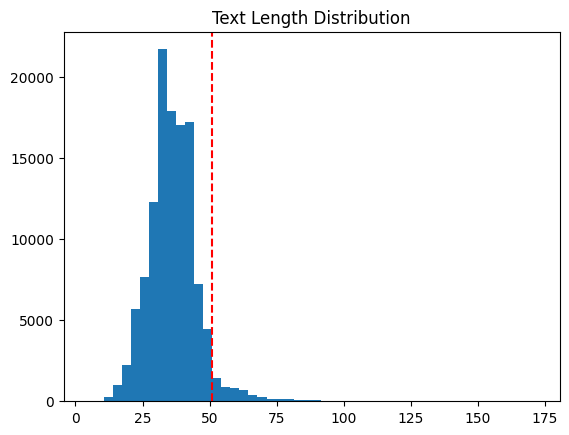

In [75]:
plt.hist(text_lengths, bins=50)
plt.axvline(maxlen, color='r', linestyle='--')
plt.title("Text Length Distribution")
plt.show()